# Importing packages and libraries

In [1]:
# dataframe
import pandas as pd

# numbers and arrays
import numpy as np

# charts and plots
import matplotlib.pyplot as plt
import seaborn as sns

# dates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# sklearn algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score


# Reading the files

In [2]:
key = pd.read_csv("key.csv")
sales = pd.read_csv("sales.csv")
weather = pd.read_csv("weather.csv")

# Section A (Exploration and visualization)

## Key dataset

In [3]:
display(key.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_nbr    45 non-null     int64
 1   station_nbr  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


None

We have two int64 columns, without any missing or null values (45 entries and 45 non-null).

For further explration , let's show the as a table

In [4]:
display(key.head(10))

store_nbr  station_nbr
0          1            1
1          2           14
2          3            7
3          4            9
4          5           12
5          6           14
6          7            6
7          8            4
8          9           17
9         10           12

This dataset tells each store belongs to which station. Will check if there is any interesting correlation by plotting the correlation matrix

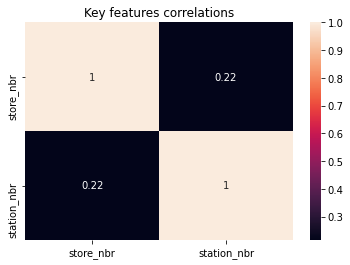

In [5]:
sns.heatmap(key.corr(), annot=True)
plt.title("Key features correlations")
plt.show()

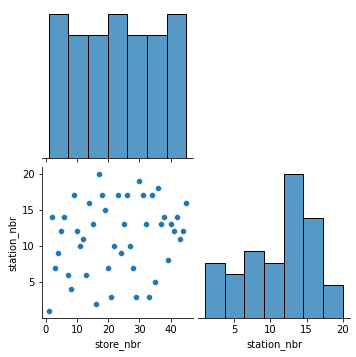

In [6]:
sns.pairplot(key, corner=True)
plt.show()

In conclusion, key dataset have no missing values and need no further preprocessing. It maps the sotre to the station.

## Sales dataset

In [7]:
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


None

We can notice that we have 3 int64 columns with the store_nbr, item_nbr and units . And the fourth column is the date column with type of object (string). 

Check if we missing values

In [8]:
sales['date'] = pd.to_datetime(sales['date'])
for col in sales.columns:
    print(col, 'have a total of', sales[col].isna().sum(), ' null values')
    print(col, 'unique values', sales[col].unique())

date have a total of 0  null values
date unique values ['2012-01-01T00:00:00.000000000' '2012-01-02T00:00:00.000000000'
 '2012-01-03T00:00:00.000000000' ... '2014-10-29T00:00:00.000000000'
 '2014-10-30T00:00:00.000000000' '2014-10-31T00:00:00.000000000']
store_nbr have a total of 0  null values
store_nbr unique values [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 35]
item_nbr have a total of 0  null values
item_nbr unique values [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111]
units have a total of 0  nu

As noticed there is no missing/null values. Let's show as a table

In [9]:
display(sales.sample(20))

date  store_nbr  item_nbr  units
3985276 2014-05-21          5        44      0
609976  2012-05-04         41        32      0
2264974 2013-04-03         25        20      0
819919  2012-06-16         24        74      0
1507401 2012-11-01          8        22      0
2346185 2013-04-24         24        90      0
4233202 2014-07-28         14       107      0
3582062 2014-02-19         18        93      0
3397953 2014-01-08         45        22      0
380055  2012-03-18         37       103      0
2405146 2013-05-08         23       110      0
1766665 2012-12-23          3       101      0
3076538 2013-10-27         29        63      0
4367613 2014-08-29         32        97      0
68771   2012-01-15          4        63      0
2237205 2013-03-28         13         1      0
3221124 2013-11-29         23        16      0
137304  2012-01-29          5       109      0
3992873 2014-05-22         39        93      0
4509894 2014-10-05         41        76      0

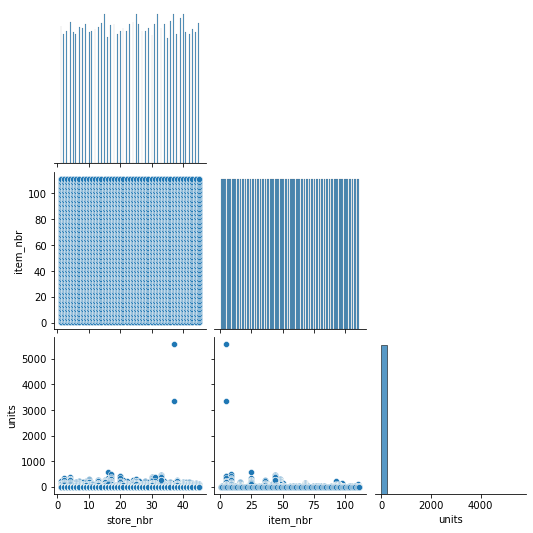

In [10]:
sns.pairplot(sales, corner=True)
plt.show()

For example we will take item 9 sales in store 1

In [11]:
example = sales.groupby(['store_nbr', 'item_nbr']).get_group((1,9))
display(example.head(10))

date  store_nbr  item_nbr  units
8     2012-01-01          1         9     29
4892  2012-01-02          1         9     60
9776  2012-01-03          1         9     15
14660 2012-01-04          1         9     20
19544 2012-01-05          1         9     16
24428 2012-01-06          1         9     12
29312 2012-01-07          1         9      2
34196 2012-01-08          1         9     22
39080 2012-01-09          1         9     50
43964 2012-01-10          1         9     25

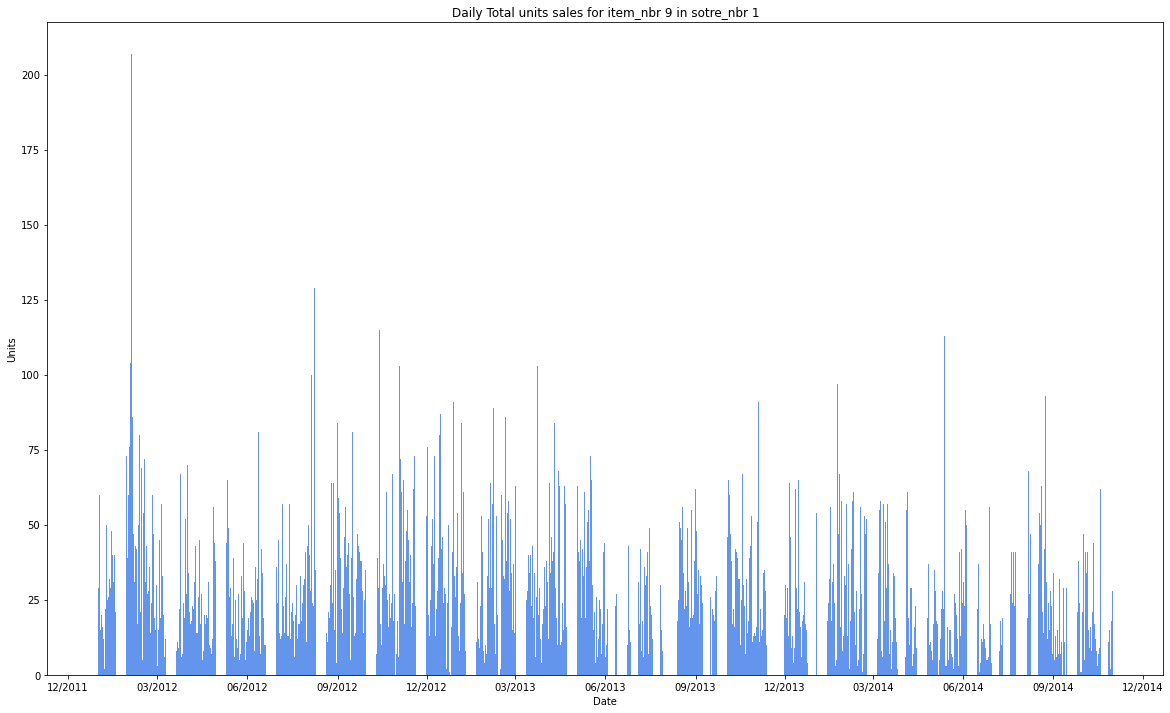

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 12))

# Add x-axis and y-axis
ax.bar(pd.to_datetime(example['date']),
       example['units'],
       color='cornflowerblue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Units",
       title="Daily Total units sales for item_nbr 9 in sotre_nbr 1")

# Define the date format
date_form = DateFormatter("%m/%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each quarter using (interval=3) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

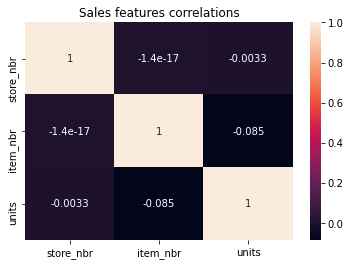

In [13]:
sns.heatmap(sales.corr(), annot=True)
plt.title("Sales features correlations")
plt.show()

In conclusion, Sales dataset shows the sales of each item in each store by date.

Further possible preprocessing may be related to date, like adding year and season.

## Weather dataset

In [14]:
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_nbr  20517 non-null  int64 
 1   date         20517 non-null  object
 2   tmax         20517 non-null  object
 3   tmin         20517 non-null  object
 4   tavg         20517 non-null  object
 5   depart       20517 non-null  object
 6   dewpoint     20517 non-null  object
 7   wetbulb      20517 non-null  object
 8   heat         20517 non-null  object
 9   cool         20517 non-null  object
 10  sunrise      20517 non-null  object
 11  sunset       20517 non-null  object
 12  codesum      20517 non-null  object
 13  snowfall     20517 non-null  object
 14  preciptotal  20517 non-null  object
 15  stnpressure  20517 non-null  object
 16  sealevel     20517 non-null  object
 17  resultspeed  20517 non-null  object
 18  resultdir    20517 non-null  object
 19  avgspeed     20517 non-nu

None

We can notice that all the columns but station_nbr are of type object, which indicates high possibilty of missing values. Therefore, we will check it out

In [15]:
weather['date'] = pd.to_datetime(weather['date'])
for col in weather.columns:
    print(col, 'have a total of', weather[col].isna().sum(), ' null values')
    print(col, ' unique values ', weather[col].unique())

station_nbr have a total of 0  null values
station_nbr  unique values  [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date have a total of 0  null values
date  unique values  ['2012-01-01T00:00:00.000000000' '2012-01-02T00:00:00.000000000'
 '2012-01-03T00:00:00.000000000' ... '2014-10-29T00:00:00.000000000'
 '2014-10-30T00:00:00.000000000' '2014-10-31T00:00:00.000000000']
tmax have a total of 0  null values
tmax  unique values  ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45'
 '60' '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26'
 '71' '58' '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75'
 '33' '51' '57' '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14'
 '22' '13' '10' '20' '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82'
 '83' '88' '87' '92' '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M'
 '97' '98' '101' '99' '100' '105' '103' '102' '106' '104' '109' '107'
 '108' '110' '111' '112' '114' '113' '19' '15' '1

snowfall  unique values  ['M' '0.0' '0.5' '  T' '0.2' '3.6' '3.7' '6.1' '0.6' '0.3' '2.0' '1.2'
 '1.4' '2.3' '1.3' '1.0' '4.3' '0.1' '1.7' '0.7' '1.9' '0.9' '0.4' '1.6'
 '4.7' '4.0' '2.1' '7.1' '4.2' '1.8' '5.2' '0.8' '1.5' '2.8' '3.0' '5.0'
 '9.3' '2.6' '3.1' '4.4' '3.4' '1.1' '5.5' '15.2' '7.8' '13.5' '16.2'
 '3.5' '2.2' '3.2' '13.1' '4.6' '2.4' '5.4' '7.2' '14.9' '7.7' '11.0'
 '2.9' '5.1' '3.3' '3.9' '7.0' '6.6' '8.0' '4.9' '6.2' '6.4' '4.1' '5.8'
 '2.7' '12.2' '10.5' '6.7' '3.8' '5.7' '2.5']
preciptotal have a total of 0  null values
preciptotal  unique values  ['0.05' '0.07' '0.00' '  T' '0.09' '0.12' '0.01' '0.02' '0.16' '0.03'
 '0.13' '0.87' '0.62' '1.32' '1.58' '0.49' '0.30' '0.04' '0.69' '1.06'
 '0.34' '0.98' '0.35' '0.11' '0.06' '0.15' '0.08' '0.22' '0.14' '0.20'
 '0.25' '0.31' '0.17' '0.24' '0.40' '0.82' '1.52' '1.44' '1.75' '0.52'
 '3.14' '5.67' '3.00' '0.71' '3.06' '2.61' '0.21' '0.23' '0.19' '1.14'
 '1.20' '1.15' '0.38' '0.48' '0.84' '0.91' '1.33' '0.67' '1.70' '0.10'
 '0

We can tell that there missing values ('-', ' ', 'M', 'T', ' T') but they are not treated as null.
Instructions notes that T stand for trace which is very small positive result we will change into 0.001 and the rest will be change into nulls.

In [16]:
display(weather.sample(20))

station_nbr       date tmax tmin tavg depart dewpoint wetbulb heat  \
12029           13 2013-09-02   90   57   74      M       51      60    0   
227             20 2012-01-12   43   27   35      M       13      28   30   
3031             4 2012-06-08   88   72   80     -1       66      70    0   
10821           14 2013-07-02   89   60   75     -5       50      60    0   
1745            18 2012-04-01   87   68   78     15       66      70    0   
13936           20 2013-12-06   33    M   17      M        M       M   48   
10061           14 2013-05-25   79   60   70     -1       64      66    0   
10560           13 2013-06-19   92   54   73      M       37      54    0   
10297           10 2013-06-06   78   70   74      M       73      73    0   
16239            3 2014-04-01   58   44   51     -6       36      44   14   
20300            4 2014-10-21   83   58   71      1       55      61    0   
9261            14 2013-04-15   77   54   66      6       42      53    0   
17814           18 2014-06-18   95   77   86      3       69      74    0   
17652           16 2014-06-10   77   57   67      M       60      63    0   
2012            19 2012-04-15   74   57   66     21       59      62    0   
10324           17 2013-06-07   82   55   69      M       57      62    0   
5033             6 2012-09-16   72   66   69     -9       65      67    0   
11128            1 2013-07-18   91   75   83      M       69      73    0   
19135           19 2014-08-23   75   68   72      3       69       M    0   
16026           10 2014-03-21   78   57   68      M       48      57    0   

      cool sunrise sunset        codesum snowfall preciptotal stnpressure  \
12029    9       -      -                       M        0.00       24.34   
227      0       -      -                     0.0        0.00       29.48   
3031    15    0529   1931                     0.0        0.01       29.21   
10821   10    0519   1949                     0.0        0.00       28.71   
1745    13    0616   1847             BR      0.0        0.00       29.18   
13936    0       -      -        FZRA BR        M        0.68           M   
10061    5    0520   1935                     0.0        0.00       28.69   
10560    8       -      -          HZ FU        M        0.00       24.08   
10297    9    0525   1926          RA BR        M        1.88       29.74   
16239    0    0610   1844                     0.0        0.00       29.23   
20300    6    0637   1754             BR      0.0        0.00       29.34   
9261     1    0558   1902                     0.0        0.00       28.35   
17814   21    0519   1938                     0.0           T       29.44   
17652    2       -      -          RA BR        M        0.06       29.85   
2012     1    0510   1833  TSRA RA BR HZ      0.0        1.00       28.85   
10324    4       -      -                     0.0        0.00       29.28   
5033     4    0616   1836          RA BR      0.0        1.29       29.48   
11128   18       -      -                       M        0.00       29.84   
19135    7    0506   1843          RA BR      0.0        1.26       29.25   
16026    3    0630   1839                       M        0.00       30.06   

      sealevel resultspeed resultdir avgspeed  
12029    29.97         3.3        19      5.8  
227      30.18        13.2        32     14.4  
3031     29.88         1.2        04      3.3  
10821    30.06         6.1        02      7.9  
1745     29.69        15.2        17     14.7  
13936        M           M         M     14.8  
10061    30.06        12.0        16     12.4  
10560    29.66        12.5        17     13.8  
10297    29.74        13.2        13     15.6  
16239    29.96         9.2        02      9.5  
20300    30.03         1.2        10      2.5  
9261     29.69        13.0        04     14.5  
17814    29.93        14.7        17     15.6  
17652    29.98         3.0        07      5.4  
2012     29.63        14.4        20     15.5  
103

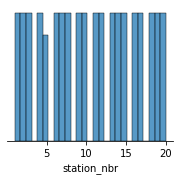

In [17]:
sns.pairplot(weather, corner=True)
plt.show()

As we can see in order to visualize this dataset we need to start with preprocessing. First thing is to change the missing values and cast into numeric columns.

In [18]:
def clean_data(df):
    WeatherCode = ['FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 
               'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', '+']
    df['WeatherCode'] = pd.Series(list(map(lambda x: sum(list(map(lambda y: x.find(y) >= 0, WeatherCode))), df.codesum)), index = df.index)
    for col in df.columns:
        df = df.replace(('-', ' '), np.nan)
        df = df.replace('M', np.nan)
        df = df.replace(('T', '  T'), 0.001)
        
        
    num_attr = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool','sunset', 'sunrise', 'snowfall', 
                'preciptotal', 'stnpressure','sealevel', 'resultspeed', 'resultdir', 'avgspeed']
    df[num_attr] = df[num_attr].astype(float)
    df = df.loc[:,df.isnull().sum()< df.shape[0]*.5]
    return df


weather = clean_data(weather)

We replaced missing values with null (np.nan) and replaced T with 0.001, in addition we dropped codesum with a numeric column describe the code and named it (WeatherCode)

In [19]:
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station_nbr  20517 non-null  int64         
 1   date         20517 non-null  datetime64[ns]
 2   tmax         19611 non-null  float64       
 3   tmin         19609 non-null  float64       
 4   tavg         19048 non-null  float64       
 5   dewpoint     19851 non-null  float64       
 6   wetbulb      19265 non-null  float64       
 7   heat         19048 non-null  float64       
 8   cool         19048 non-null  float64       
 9   sunrise      10861 non-null  float64       
 10  sunset       10861 non-null  float64       
 11  snowfall     13293 non-null  float64       
 12  preciptotal  19657 non-null  float64       
 13  stnpressure  19588 non-null  float64       
 14  sealevel     18793 non-null  float64       
 15  resultspeed  19928 non-null  float64       
 16  resu

None

In [20]:
display(weather.sample(20))

station_nbr       date  tmax  tmin  tavg  dewpoint  wetbulb  heat  \
844             10 2012-02-14  74.0  49.0  62.0      50.0     55.0   3.0   
4348             1 2012-08-13  87.0  67.0  77.0      62.0     68.0   0.0   
1608            14 2012-03-25  79.0  49.0  64.0      53.0     58.0   1.0   
8268             1 2013-02-25  40.0  28.0  34.0      28.0     32.0  31.0   
5914             7 2012-10-30  78.0  45.0  62.0      36.0     48.0   3.0   
3689             2 2012-07-11  84.0  62.0  73.0      56.0     63.0   0.0   
34              17 2012-01-02  45.0  22.0  34.0      10.0     28.0  31.0   
7977            10 2013-02-10  74.0  55.0  65.0      54.0     58.0   0.0   
3269             2 2012-06-20  92.0  63.0  78.0      68.0     72.0   0.0   
17396           20 2014-05-28  85.0  64.0  75.0      63.0     67.0   0.0   
9498            11 2013-04-27  80.0  58.0  69.0      59.0     63.0   0.0   
12787           11 2013-10-10  82.0  60.0  71.0      61.0     64.0   0.0   
8962            15 2013-03-31  59.0  20.0  40.0      23.0     34.0  25.0   
9599            12 2013-05-02  71.0  67.0  69.0      66.0     67.0   0.0   
14248           12 2013-12-22  84.0  69.0  77.0      67.0     70.0   0.0   
8866            19 2013-03-26  41.0  31.0  36.0      24.0     31.0  29.0   
9516             9 2013-04-28  80.0  50.0  65.0      46.0     54.0   0.0   
16414           18 2014-04-09  81.0  45.0  63.0      41.0     53.0   2.0   
2798             7 2012-05-27  87.0  71.0  79.0      63.0     69.0   0.0   
15360            4 2014-02-16  76.0  59.0  68.0      56.0     60.0   0.0   

       cool  sunrise  sunset  snowfall  preciptotal  stnpressure  sealevel  \
844     0.0    708.0  1814.0       NaN        0.001        30.06     30.08   
4348   12.0      NaN     NaN       NaN        0.000        29.75     29.92   
1608    0.0    627.0  1845.0     0.000        0.000        28.66     30.02   
8268    0.0      NaN     NaN       NaN        0.001        29.91     30.11   
5914    0.0      NaN     NaN     0.000        0.000        28.59     29.97   
3689    8.0    421.0  1925.0     0.000        0.000        29.08     30.17   
34      0.0      NaN     NaN     0.000        0.000        29.96     30.66   
7977    0.0    711.0  1811.0       NaN        0.000        30.21     30.23   
3269   13.0    411.0  1927.0     0.000        0.000        28.92     29.97   
17396  10.0      NaN     NaN     0.000        0.000        29.17     29.87   
9498    4.0    547.0  1901.0     0.000        0.000        30.19     30.22   
12787   6.0    626.0  1802.0     0.000        0.000        30.00     30.04   
8962    0.0    530.0  1811.0     0.000        0.130        29.65     29.99   
9599    4.0      NaN     NaN     0.000        3.020        29.93     29.97   
14248  12.0      NaN     NaN     0.000        0.000        30.05     30.10   
8866    0.0    545.0  1809.0     0.001        0.001        29.43     30.17   
9516    0.0      NaN     NaN       NaN        0.090        29.00     29.78   
16414   0.0    605.0  1852.0     0.000        0.000        29.57     30.10   
2798   14.0      NaN     NaN     0.000        0.000        28.46     29.80   
15360   3.0    710.0  1819.0     0.000        0.000        29.29     30.00   

       resultspeed  resultdir  avgspeed  WeatherCode  
844            4.2       17.0       5.7            2  
4348           4.6       25.0       5.4            0  
1608           5.9       15.0       6.3            0  
8268           2.4        1.0       2.8            2  
5914           9.3       21.0      10.1            0  
3689           3.0       24.0       5.8            0  
34             3.7       33.0       4.8            0  
7977           9.1       12.0      10.3            0  
3269          10.2       27.0      10.5            1  
17396          4.6        1.0       5.6            3  
9498           7.1        7.0       7.6            0  
12787          2.2       34.0       2.7            0  
8962           4.2       17.0       5.5            2  
9

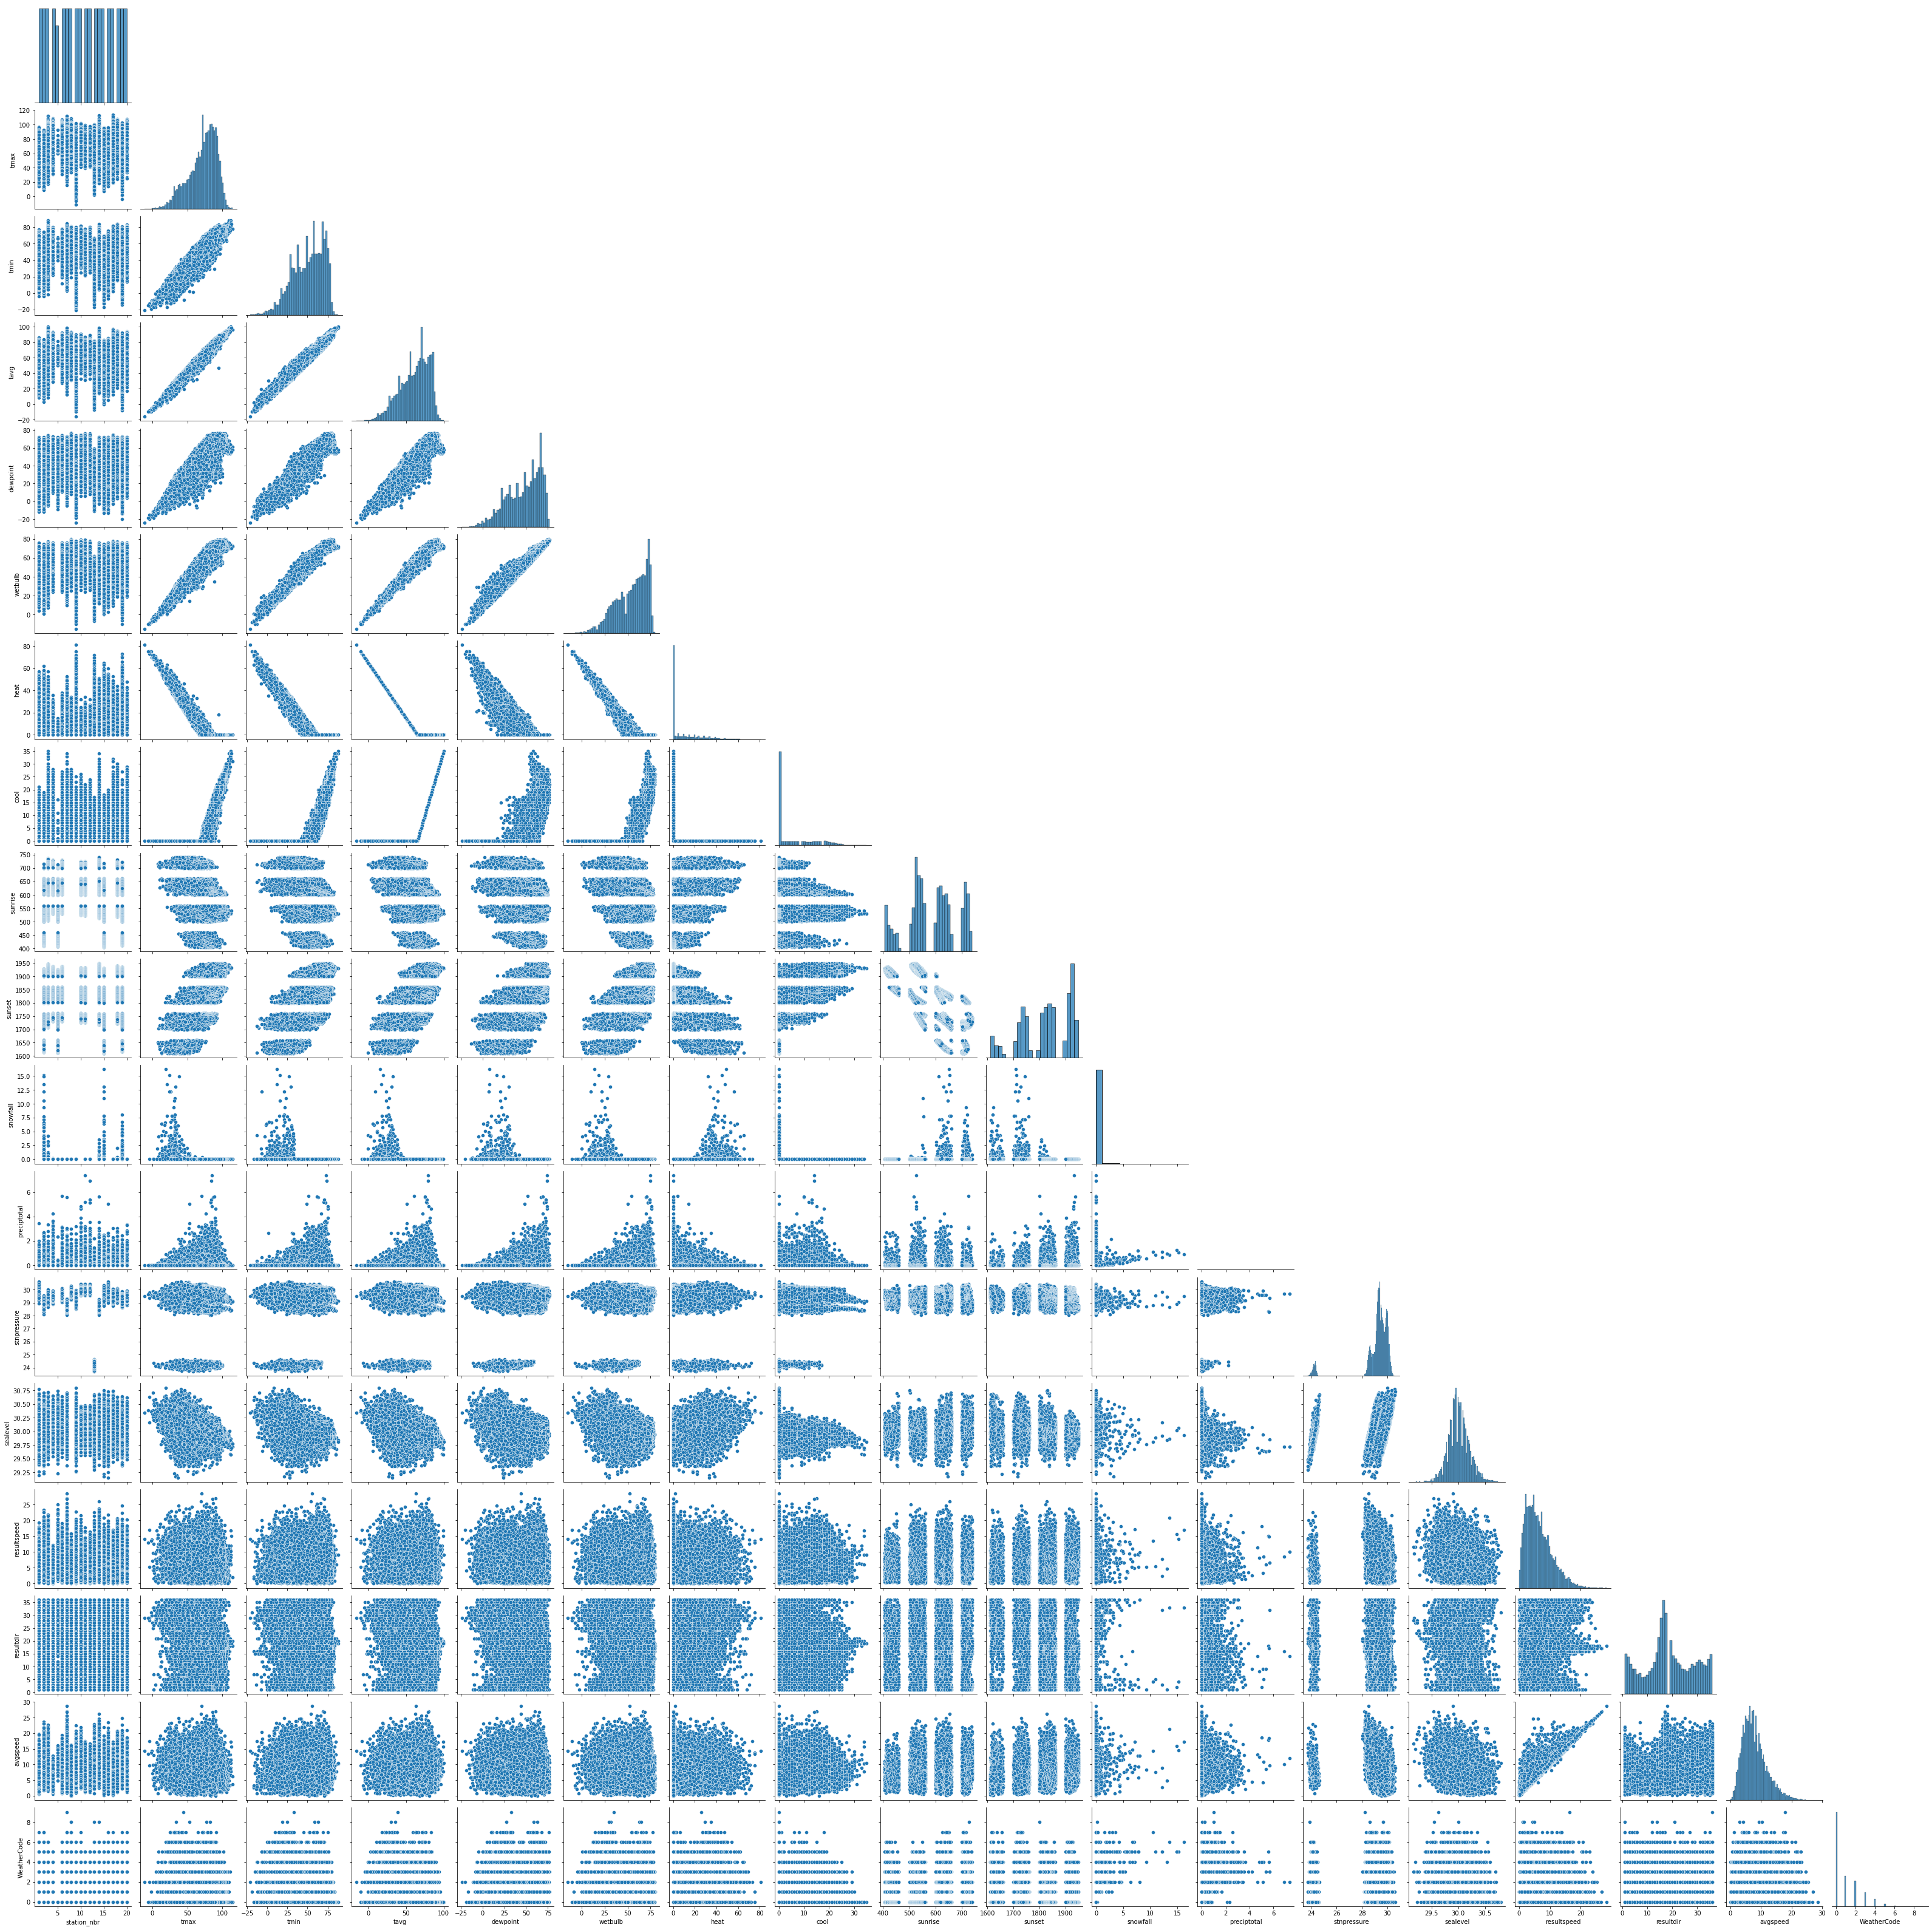

In [21]:
sns.pairplot(weather, corner=True)
plt.show()

Now that we can visualize, will plot daily preciptotal in station 1 as an example

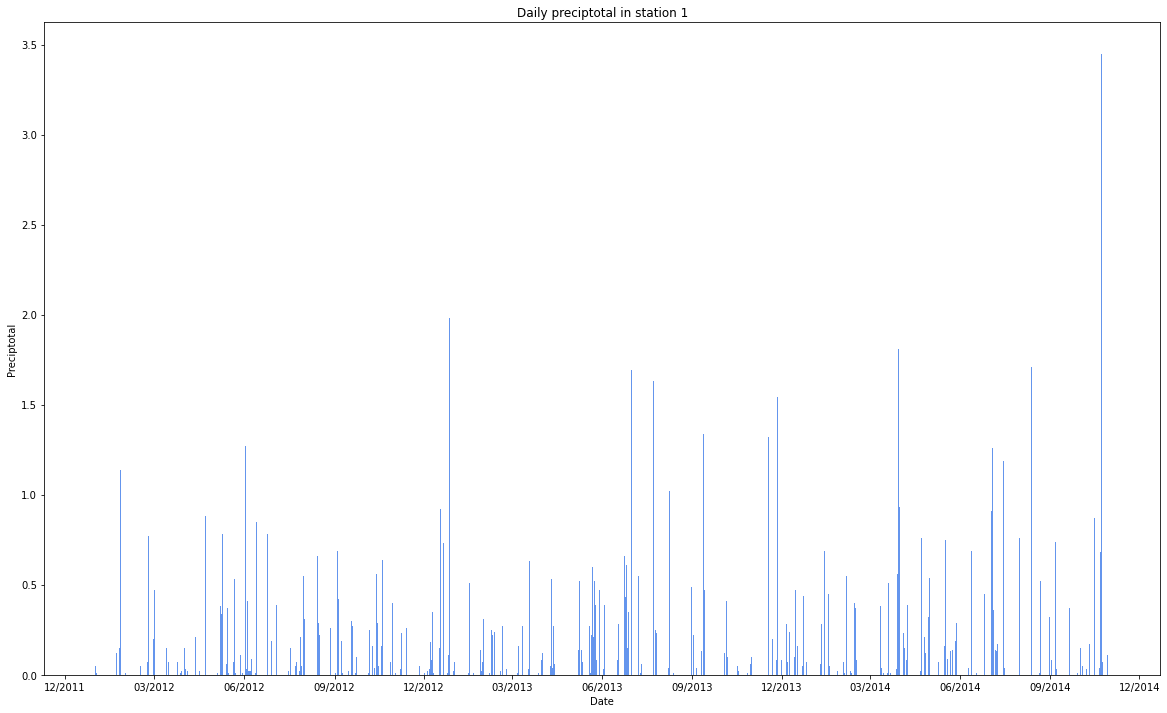

In [22]:
station1 = weather.groupby(['station_nbr']).get_group((1))
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 12))

# Add x-axis and y-axis
ax.bar(pd.to_datetime(station1['date']),
       station1['preciptotal'],
       color='cornflowerblue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Preciptotal",
       title="Daily preciptotal in station 1")

# Define the date format
date_form = DateFormatter("%m/%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each quarter using (interval=3) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

Let's now check the correlation matrix for weather dataset, as it has 19 columns there is high possiblity that some of these features are highly correlated and thus adds no further information

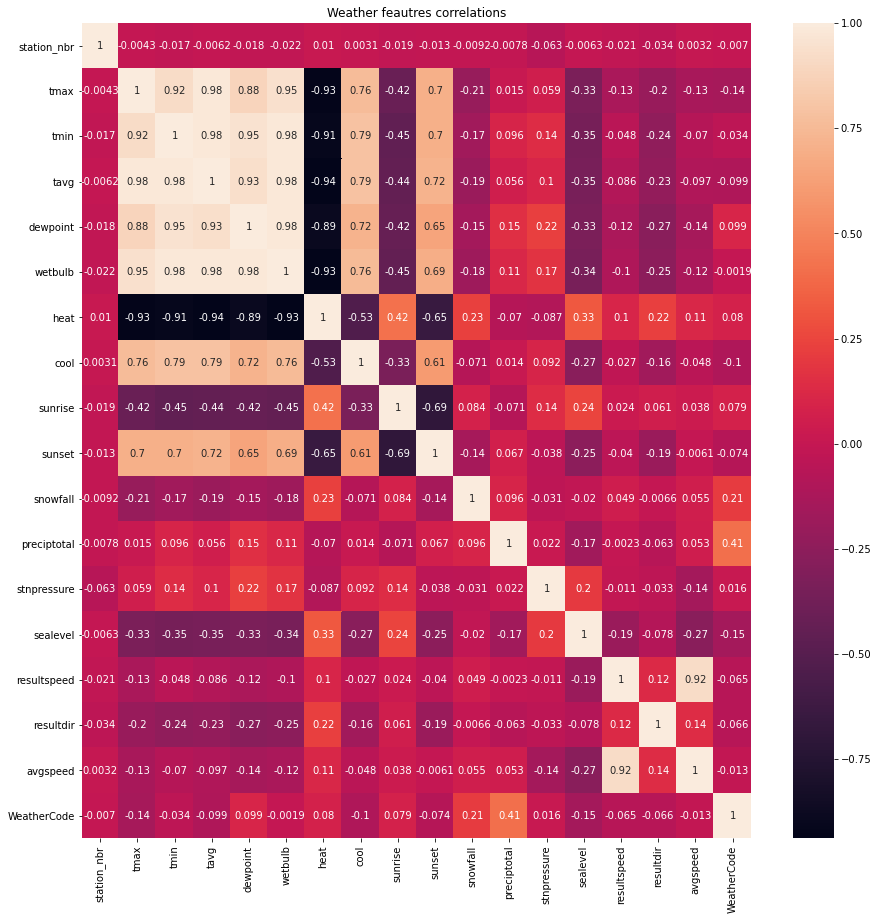

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(weather.corr(), annot=True)
plt.title("Weather feautres correlations")
plt.show()

As expected we have two blocks of highly correlated features:

1- tmax, tmin, tavg, dewpoint, wetbulb and heat.

2- resultspeed and avgspeed.

In each block it is enough to keep only one member.

In conclusion, Weather dataset describes the weather by date and station, and needs few preprocessing steps like dropping high correlated features, dropping high missing values features/entries and imputing missing values.

# Section B (Preprocessing)

## Key dataset

Needs no preprocessing

## Sales dataset

In [25]:
# adding year column
sales['year'] = sales['date'].dt.strftime('%Y')
sales['year'] = pd.to_numeric(sales['year'])

In [26]:
# adding season categorical column
sales['date_offset'] = (sales.date.dt.month*100 + sales.date.dt.day - 320)%1300

sales['season'] = pd.cut(sales['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])
sales = sales.drop(columns=['date_offset'])
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date       datetime64[ns]
 1   store_nbr  int64         
 2   item_nbr   int64         
 3   units      int64         
 4   datetime   datetime64[ns]
 5   year       int64         
 6   season     category      
dtypes: category(1), datetime64[ns](2), int64(4)
memory usage: 215.8 MB


None

## Weather dataset

In [27]:
# 1- dropping high correlated features (tmin, tmax, dewpoint, wetbulb, heat, resultspeed)
weather = weather.drop(columns=['tmin', 'tmax', 'dewpoint', 'wetbulb', 'heat', 'resultspeed'])

# 2- dropping features that have less than 65% non-null values
weather.dropna(axis=1, how='any', thresh=len(weather)*0.65, subset=None, inplace=True)
weather = weather.reset_index(drop=True) # reset the index to leave to no gaps

# 3- dropping entries that have less than 65% non-null values
weather.dropna(axis=0, how='any', thresh=len(weather.columns)*0.65, subset=None, inplace=True)
weather = weather.reset_index(drop=True) # reset the index to leave to no gaps

display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19632 entries, 0 to 19631
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station_nbr  19632 non-null  int64         
 1   date         19632 non-null  datetime64[ns]
 2   tavg         19045 non-null  float64       
 3   cool         19045 non-null  float64       
 4   preciptotal  19628 non-null  float64       
 5   stnpressure  19567 non-null  float64       
 6   sealevel     18397 non-null  float64       
 7   resultdir    19518 non-null  float64       
 8   avgspeed     19624 non-null  float64       
 9   WeatherCode  19632 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 1.5 MB


None

It can be noticed that columns dropped from 19 to 10, and entries 4617600  from to 19632.

Dropping high null values entries helps to keep the real distrubtion with  minimal distorations, as imputing many values for the same entry may cause unwanted distoreations and thus causing a high bias.

In [32]:
knnimputer = KNNImputer(n_neighbors=7)
noNullWeather = pd.DataFrame(knnimputer.fit_transform(weather.drop(columns=['date'])))
noNullWeather.set_axis(['station_nbr', 'tavg', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultdir', 'avgspeed', 'WeatherCode'], axis=1, inplace=True)
noNullWeather['date'] = weather['date']
display(noNullWeather.sample(20))

station_nbr       tavg       cool  preciptotal  stnpressure   sealevel  \
7652           3.0  43.000000   0.000000        0.000    29.520000  30.240000   
6449           2.0  31.000000   0.000000        0.000    29.621429  30.157143   
1853          15.0  39.000000   0.000000        0.000    29.590000  29.970000   
8110           6.0  70.000000   5.000000        0.000    29.260000  29.810000   
16708         19.0  62.000000   0.000000        0.000    29.450000  30.190000   
6058          11.0  56.000000   0.000000        0.000    30.140000  30.170000   
15607         20.0  78.000000  13.000000        0.001    29.050000  29.760000   
7044           2.0  28.000000   0.000000        0.000    29.060000  30.230000   
3870           2.0  74.000000   9.000000        0.010    28.920000  29.970000   
12229          1.0  57.000000   0.000000        0.410    30.040000  30.210000   
11410         10.0  80.000000  15.000000        0.040    30.140000  30.170000   
6491           8.0  77.428571  13.285714        0.000    29.490000  30.061429   
10049         13.0  74.000000   9.000000        0.000    24.210000  29.770000   
18902         13.0  67.000000   2.000000        0.001    24.350000  30.010000   
3585           2.0  76.000000  11.000000        0.000    28.770000  29.840000   
532            1.0  37.000000   0.000000        0.000    29.830000  30.010000   
6970           4.0  39.000000   0.000000        0.001    29.700000  30.420000   
12410         12.0  72.000000   7.000000        0.370    29.940000  29.990000   
2249          12.0  75.000000  10.000000        0.000    30.040000  30.090000   
15258         12.0  63.000000   0.000000        0.000    30.090000  30.120000   

       resultdir  avgspeed  WeatherCode       date  
7652         1.0       5.7          1.0 2013-02-08  
6449        32.0       8.2          0.0 2012-12-06  
1853        34.0       7.9          0.0 2012-04-07  
8110        20.0      13.9          0.0 2013-03-04  
16708        5.0       4.5          1.0 2014-05-30  
6058        35.0       6.5          1.0 2012-11-15  
15607       17.0      11.1          1.0 2014-04-02  
7044        29.0       8.6          0.0 2013-01-07  
3870        23.0      10.7          2.0 2012-07-23  
12229        5.0       6.1          2.0 2013-10-06  
11410        4.0      13.2          0.0 2013-08-25  
6491        18.0       6.6          1.0 2012-12-08  
10049       18.0      12.5          0.0 2013-06-14  
18902       27.0       7.6          1.0 2014-09-23  
3585        31.0       8.9          0.0 2012-07-08  
532         25.0      11.4          0.0 2012-01-29  
6970        36.0       3.9          0.0 2013-01-03  
12410        1.0       9.8          2.0 2013-10-15  
2249        14.0       5.1          1.0 2012-04-28  
15258       18.0       4.8          0.0 2014-03-15

In [33]:
print(noNullWeather.isna().sum())

station_nbr    0
tavg           0
cool           0
preciptotal    0
stnpressure    0
sealevel       0
resultdir      0
avgspeed       0
WeatherCode    0
date           0
dtype: int64


Now, weather dataset is cleaned, and ready to visualization and adding some additional features

In [34]:
noNullWeather['rainyDay'] = np.nan
for row in range(0, len(noNullWeather)):
    flag = noNullWeather['preciptotal'].values[row] > 0
    noNullWeather['rainyDay'].values[row] = flag
    
display(noNullWeather.sample(20))

station_nbr       tavg       cool  preciptotal  stnpressure   sealevel  \
3672          14.0  83.000000  18.000000        0.000        28.59  29.930000   
11728         14.0  80.000000  15.000000        0.000        28.68  30.010000   
19267         17.0  60.000000   0.000000        0.010        29.10  29.830000   
9337          20.0  70.000000   5.000000        0.000        29.27  29.990000   
4              6.0  49.000000   0.000000        0.000        29.95  30.470000   
16586         11.0  81.000000  16.000000        0.000        29.99  30.040000   
10791         15.0  71.000000   6.000000        2.400        29.33  29.660000   
7668          20.0  54.000000   0.000000        0.000        29.44  30.150000   
4632           8.0  83.857143  18.857143        0.000        29.66  29.892857   
16029          4.0  76.000000  11.000000        0.000        29.23  29.910000   
17546          2.0  75.000000  10.000000        0.140        28.84  29.900000   
13496         19.0   9.000000   0.000000        0.001        29.65  30.430000   
16969         15.0  59.000000   0.000000        0.880        29.59  29.930000   
10014         16.0  62.000000   0.000000        0.150        29.51  29.640000   
7434          14.0  57.000000   0.000000        0.001        28.51  29.910000   
3325           8.0  75.428571  13.428571        0.000        29.55  30.080000   
8171          10.0  51.000000   0.000000        0.000        30.16  30.190000   
19268         18.0  65.000000   0.000000        0.001        29.28  29.840000   
463            9.0  28.000000   0.000000        0.001        29.28  30.100000   
14681          4.0  51.000000   0.000000        0.000        29.28  30.020000   

       resultdir  avgspeed  WeatherCode       date  rainyDay  
3672        11.0       4.8          0.0 2012-07-12       0.0  
11728       17.0       9.0          0.0 2013-09-10       0.0  
19267       17.0       7.3          2.0 2014-10-12       1.0  
9337        15.0       4.0          0.0 2013-05-07       0.0  
4           36.0      13.8          0.0 2012-01-01       0.0  
16586        4.0       5.5          1.0 2014-05-24       0.0  
10791       35.0       2.9          4.0 2013-07-23       1.0  
7668         1.0       8.2          0.0 2013-02-08       0.0  
4632        19.0       5.3          2.0 2012-09-01       0.0  
16029       11.0       5.9          0.0 2014-04-25       0.0  
17546       22.0       8.6          2.0 2014-07-14       1.0  
13496       29.0       9.8          1.0 2013-12-11       1.0  
16969        6.0       4.1          3.0 2014-06-13       1.0  
10014       31.0       8.8          1.0 2013-06-12       1.0  
7434        17.0      16.0          4.0 2013-01-27       1.0  
3325        11.0       1.1          0.0 2012-06-24       0.0  
8171        36.0       6.8          0.0 2013-03-07       0.0  
19268       16.0      10.3          2.0 2014-10-12       1.0  
463         16.0       8.8          3.0 2012-01-25       1.0  
14681       18.0       3.7          0.0 2014-02-13       0.0

# Section C (unit sales predicition)

In [35]:
daterain = noNullWeather[['date','station_nbr','rainyDay']].merge(key)
mergeAll = daterain.merge(sales)
display(mergeAll.sample(20))

date  station_nbr  rainyDay  store_nbr  item_nbr  units  \
1745416 2012-04-04         11.0       1.0         43        53      0   
4446877 2013-01-01         20.0       1.0         17       107      0   
4332915 2012-07-24         19.0       1.0         30        31      0   
775567  2014-04-30          6.0       0.0         13        11      0   
1128768 2012-07-29          8.0       0.0         39        10      0   
1869096 2013-11-21         11.0       1.0         43        79      0   
312341  2012-12-10          3.0       0.0         21        99      0   
1878926 2014-01-29         11.0       1.0         12        30      0   
3716621 2012-08-03         17.0       1.0         18         9      0   
3220756 2014-06-16         14.0       0.0          2        92      0   
1527297 2012-11-02         10.0       0.0         11        49      0   
3620226 2012-03-11         17.0       1.0         23        73      0   
1736361 2012-02-23         11.0       1.0         43       100      0   
607884  2012-01-22          6.0       1.0          7        49      0   
1501932 2012-08-17         10.0       1.0         27       103      0   
3696317 2012-07-03         17.0       0.0         31        18      0   
1648184 2014-02-02         10.0       0.0         11        57      0   
3547422 2014-06-08         16.0       0.0         14        85      0   
206901  2012-01-28          3.0       0.0         29       109      0   
1031572 2014-01-31          7.0       0.0         20        50      0   

          datetime  year  season  
1745416 2012-04-04  2012  spring  
4446877 2013-01-01  2013  winter  
4332915 2012-07-24  2012  summer  
775567  2014-04-30  2014  spring  
1128768 2012-07-29  2012  summer  
1869096 2013-11-21  2013  autumn  
312341  2012-12-10  2012  autumn  
1878926 2014-01-29  2014  winter  
3716621 2012-08-03  2012  summer  
3220756 2014-06-16  2014  spring  
1527297 2012-11-02  2012  autumn  
3620226 2012-03-11  2012  winter  
1736361 2012-02-23  2012  winter  
607884  2012-01-22  2012  winter  
1501932 2012-08-17  2012  summer  
3696317 2012-07-03  2012  summer  
1648184 2014-02-02  2014  winter  
3547422 2014-06-08  2014  spring  
206901  2012-01-28  2012  winter  
1031572 2014-01-31  2014  winter

In [36]:
key_sum = mergeAll[mergeAll['item_nbr'].isin([5,6,9,16,45])]

In [37]:
restItems = mergeAll[~mergeAll['item_nbr'].isin([5,6,9,16,45])]
display(restItems['item_nbr'].unique())

array([  1,   2,   3,   4,   7,   8,  10,  11,  12,  13,  14,  15,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111], dtype=int64)

In [50]:
X_test = key_sum.drop(columns=['units','date','datetime','season'])
y_test = key_sum['units']
X = restItems.drop(columns=['units','date','datetime','season'])
y = restItems['units']
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.33, random_state=42)
display(X_test.head())
display(X_train.head())
display(X_val.head())

station_nbr  rainyDay  store_nbr  item_nbr  year
4           1.0       1.0          1         5  2012
5           1.0       1.0          1         6  2012
8           1.0       1.0          1         9  2012
15          1.0       1.0          1        16  2012
44          1.0       1.0          1        45  2012

station_nbr  rainyDay  store_nbr  item_nbr  year
2890870         14.0       0.0          2        98  2012
2828593         13.0       1.0         40        92  2014
3136092         14.0       0.0         38        10  2013
1007614          7.0       0.0         20        68  2013
1656328         10.0       1.0         22        98  2014

station_nbr  rainyDay  store_nbr  item_nbr  year
1199771          8.0       1.0         39        84  2014
2506204         13.0       0.0         15        47  2012
1103087          7.0       0.0          3        81  2014
1437273         10.0       0.0         27        46  2012
4238407         18.0       1.0         36        95  2012

In [71]:
dtRegressor = DecisionTreeRegressor(random_state= 40, max_depth = 11, splitter= 'best')
dtRegressor.fit(X_train, y_train)

# Hyperparameters
hp = {
    "splitter":["best","random"],
            "max_depth" : [1,3,5,7]      
}

# define grid search
#reg_grid_search = GridSearchCV(estimator=dtRegressor, param_grid=hp, cv=10)

# fit estimator
#reg_grid_search.fit(X_val, y_val)

# get best estimator
#reg_best = reg_grid_search.best_estimator_

# print best parameters
#pd.DataFrame.from_dict(reg_grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [72]:
from sklearn import tree
#tree.plot_tree(dtRegressor)
dtrpreds = dtRegressor.predict(X_test)
print("Decision tree regressor r2_score: ",r2_score(y_test, dtrpreds))

Decision tree regressor r2_score:  -0.16208063255957117


In [77]:
adaReg = AdaBoostRegressor(random_state= 40)

# Hyperparametrs
hp = {
    'n_estimators' : [5, 10, 15, 30, 50, 80, 100],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# define grid search
ada_grid_search = GridSearchCV(estimator=adaReg, param_grid=hp, cv=10)

# fit estimator
ada_grid_search.fit(X_train, y_train)

# get best estimator
ada_best = ada_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(ada_grid_search.best_params_, orient='index', columns=['Selected Value']).T

KeyboardInterrupt: 

In [ ]:
adaRegPreds = ada_best.predict(X_test)
print("Adaboost regressor mean_squared_error: ", mean_squared_error(y_test, adaRegPreds))
print("Adaboost regressor r2_score: ", r2_score(y_test, adaRegPreds))